Question 1i)The simulation is repeated 40 times to obtain an average result. The simulation proceeds by initializing an array P representing the population, where 0 indicates an immune individual, 1 indicates a susceptible individual, and 2 indicates an infected individual. The initial immune and infected individuals are randomly selected from the population. The simulation then proceeds by looping over the days, and for each day, looping over each individual in the population. The disease spreads by infecting susceptible individuals within a certain radius of an infected individual, and there is a chance of recovery per day for infected individuals. The number of infected, susceptible, and immune individuals are recorded for each day.

ii)A loop that repeats the simulation 40 times for statistical averaging, starting with initializing the array P representing the population.
A loop that initializes the susceptible individuals in the population.
A loop that initializes the immune individuals in the population.
A loop that initializes the first infected individual in the population.
A loop that iterates over each day of the simulation.
A loop that iterates over each individual in the population, spreading the disease and calculating the chance of recovery for infected individuals.
A loop that counts the number of infected and susceptible individuals for each day of the simulation.


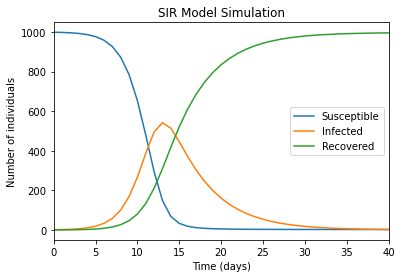

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial parameters
N = 1000   # Total population
I0 = 1       # Initial number of infected individuals
R0 = 0         # Initial number of recovered individuals
S0 = N - I0 - R0  # Initial number of susceptible individuals
beta = 1     # Contact rate
gamma = 0.2    # Recovery rate

# Define S-I-R model function
def sir_model(S, I, R, beta, gamma):
    dS = -beta * S * I / N
    dI = beta * S * I / N - gamma * I
    dR = gamma * I
    return dS, dI, dR

# Initialize arrays to store model results
S = [S0]
I = [I0]
R = [R0]

# Define simulation parameters
t_max = 365
dt = 1
t = np.arange(0, t_max, dt)

# Simulate the model using the Euler method
for i in range(len(t) - 1):
    dS, dI, dR = sir_model(S[i], I[i], R[i], beta, gamma)
    S.append(S[i] + dS * dt)
    I.append(I[i] + dI * dt)
    R.append(R[i] + dR * dt)

# Plot the results
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.title('SIR Model Simulation')
plt.xlim([0,40])
plt.legend()
plt.show()


question 2i) Implement the pseudo code above in Python and plot in one graph the average number of students susceptible, infected and affected in total (removed) for the period of 40 days

Total number of students infected in 40 days: 957.20


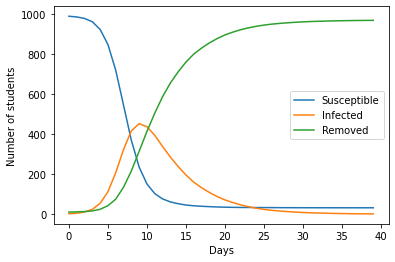

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Define the simulation parameters
population = 1000
imun = 0.01
recover = 0.2
num_infect = 1
days = 40
reps = 40
removed = 0
data_inf = np.zeros(days)
data_sus = np.zeros(days)
data_rem = np.zeros(days)

for k in range(reps):
    # Initialize student array
    P = [1] * population
    n = 0
    # Create immune population
    n = int(imun * population)
    rr = random.sample(range(population), n)
    for r in rr:
        P[r] = 0
    
    # Create initial infected population
    r = random.randint(0, population-1)
    P[r] = 2
    
    # Loop over days
    for j in range(days):
        # Loop over students
        for i in range(population):
            # Spread infection
            if P[i] == 2:
                for x in range(num_infect):
                    r = np.random.randint(population)
                    if P[r] == 1:
                        P[r] = 2
                        removed += 1
            # Chance of recovery
            if P[i] == 2 and np.random.rand() < recover:
                P[i] = 0
        
        # Count for susceptible, infected, and removed students
        s = sum(1 for l in P if l == 1)
        c = sum(1 for l in P if l == 2)
        r = sum(1 for l in P if l == 0)
        
        # Save the data
        data_inf[j] += c
        data_sus[j] += s
        data_rem[j] += r

# Compute the graph data
data_inf /= reps
data_sus /= reps
data_rem /= reps

num_infected = removed / reps  # total number of students infected in 40 days
print(f"Total number of students infected in 40 days: {num_infected:.2f}")

# Plot the data
plt.plot(range(days), data_sus, label='Susceptible')
plt.plot(range(days), data_inf, label='Infected')
plt.plot(range(days), data_rem, label='Removed')
plt.xlabel('Days')
plt.ylabel('Number of students')
plt.legend()
plt.show()




Question 2ii) One Problem with the rules of S-I-R are that it does not take into account of the variability of infection. Some people will spread disease to more people due to bigger social circles and some people less. For example if a quarantine were to occur than its unlikely that the disease would spread at the same rate. Another factor is the algorithm does not take the spacial component of disease spread into account.

Question 3)

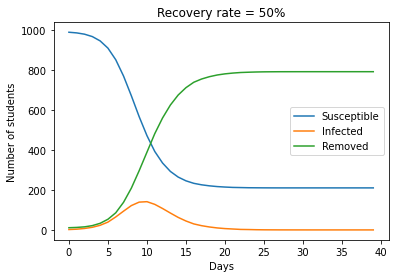

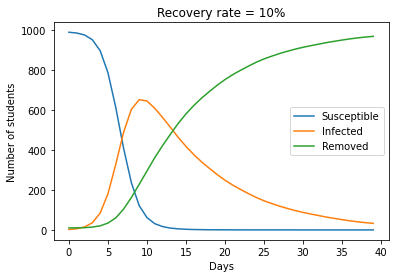

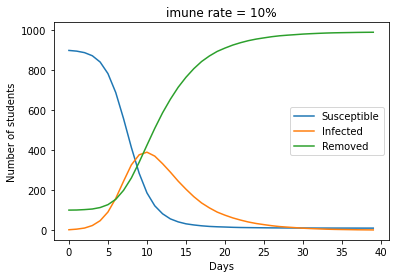

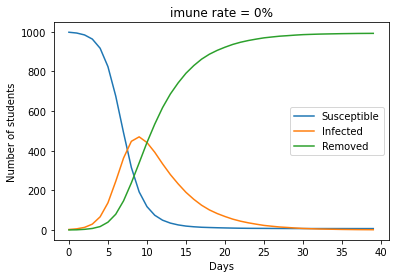

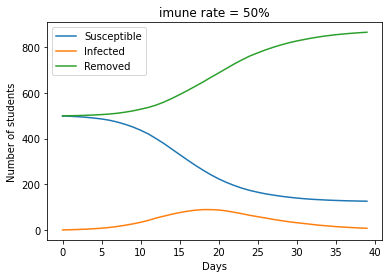

In [5]:
from IPython.display import display
from PIL import Image

# Load an image file
img = Image.open(r"C:\Users\hughd\Desktop\molecular simulation\recovery 50%.png")
img_1 = Image.open(r"C:\Users\hughd\Desktop\molecular simulation\recovery 10%.png")
img_2 = Image.open(r"C:\Users\hughd\Desktop\molecular simulation\imune 10%.png")
img_3 = Image.open(r"C:\Users\hughd\Desktop\molecular simulation\imune 0%.png")
img_4 = Image.open(r"C:\Users\hughd\Desktop\molecular simulation\imune 50%.png")
# Display the image in the Jupyter Notebook
display(img)
display(img_1)
display(img_2)
display(img_3)
display(img_4)

Recovery rate is the most important factor as a recovery rate of 50% has a pandemimic of only 15 days. On the other hand a recovery rate of 10% creates a pandemic that would last longer than the 40 day trial period. The immune rate doesn't seem to affect the length of the pandemic signifficantly, however the diseases takes longer to reach its peak with more imune people. Some general rules of this disease spread. The recovery rates is the biggest factor in pandemic length. When the recovery rate is as high as 50% the disease struggles to infect a large number of people as the infected carriers are decreasing so quickly. Imunity has the biggest effect when the imunity is large, where although the pandemic lasts the same time span the amount infected is reduced massively

Question 4) In some diseases, such as colds and influenza, after becoming infected a person is again susceptible; a minor change in the algorithm allows this to be considered. What is the effect on the disease propagation, in particular the duration of the epidemic?

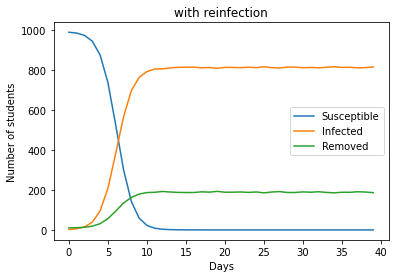

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Define the simulation parameters
population = 1000
imun = 0.01
recover = 0.2
num_infect = 1
days = 40
reps = 40
removed = 0
data_inf = np.zeros(days)
data_sus = np.zeros(days)
data_rem = np.zeros(days)

for k in range(reps):
    # Initialize student array
    P = [1] * population
    n = 0
    # Create immune population
    n = int(imun * population)
    rr = random.sample(range(population), n)
    for r in rr:
        P[r] = 0

    # Create initial infected population
    r = random.randint(0, population-1)
    P[r] = 2

    # Loop over days
    for j in range(days):
        # Loop over students
        for i in range(population):
            # Spread infection
            if P[i] == 2 or P[i] == 3:  # individuals in recovered state can be infected again
                for x in range(num_infect):
                    r = np.random.randint(population)
                    if P[r] == 1:
                        P[r] = 2
                        removed += 1
                    elif P[r] == 3:  # individuals in recovered state can be reinfected
                        P[r] = 2
                        removed += 1
            # Chance of recovery
            if P[i] == 2 and np.random.rand() < recover:
                P[i] = 3  # individuals move to recovered state

        # Count for susceptible, infected, and removed students
        s = sum(1 for l in P if l == 1)
        c = sum(1 for l in P if l == 2)
        r = sum(1 for l in P if l == 0 or l == 3)  # individuals in recovered state also count as removed

        # Save the data
        data_inf[j] += c
        data_sus[j] += s
        data_rem[j] += r

    # Reset the removed counter for the next simulation run
    removed = 0

# Compute the graph data
data_inf /= reps
data_sus /= reps
data_rem /= reps


# Plot the data
plt.plot(range(days), data_sus, label='Susceptible')
plt.plot(range(days), data_inf, label='Infected')
plt.plot(range(days), data_rem, label='Removed')
plt.title('with reinfection')
plt.xlabel('Days')
plt.ylabel('Number of students')
plt.legend()
plt.show()


With reinfection possible directly after recovery the infection plataus at approximately 10 days. The infected are almost certain to infect any recovered people as the amount of infected is too high this creates a constant number of infected where any person that recovers is instantly reinfected. In reality this would not be the case as after being infected the person could isolate causing reninfection to be significantly less likely than before.

Bonus Point:
I think I deserve a bonus point for solving the problem with differential equations although it was not necessary.

Self Analysis:
I think I performed well this week and answered most problems correctly, my data makes sense and is outputted in a clear manner. I could have collected more variations of the data in question 3, however I feel like my data is sufficient for the point I am trying to make.